<a href="https://colab.research.google.com/github/princ1211/MaskDetect/blob/main/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf 
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


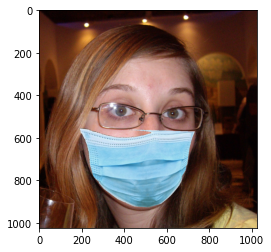

In [8]:
DataDirectory= "/content/drive/MyDrive/Dataset/"
classes=["FaceMask", "NoMask"]
for category in classes:
  path= os.path.join(DataDirectory, category)
  for img in os.listdir(path):
    img_array= cv2.imread(os.path.join(path,img))
    plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
    plt.show()
    break
  break

# New Section

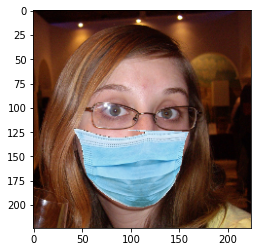

In [9]:
img_size=224
new_array= cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,  cv2.COLOR_BGR2RGB))

In [10]:
training_data=[]
def create_training_data():
  for category in classes:
    path=os.path.join(DataDirectory, category)
    class_num= classes.index(category)
  
    for img in os.listdir(path):
      try:
        img_array= cv2.imread(os.path.join(path,img))
        new_array= cv2.resize(img_array,(img_size, img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass
 

In [12]:
create_training_data()

KeyboardInterrupt: ignored

In [ ]:
print(len(training_data))

Image Dataset get loaded !

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
X = []  ##data
y = [] ##label

for features, label in training_data:
  X.append(features)
  y.append(label)


X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape
X = X/225.0;

In [ ]:
y[100]

In [ ]:
Y = np.array(y)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()


pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

**Transfer Learning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output=model.laters[-4].output

In [ ]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [ ]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metric=["accuracy"])

In [ ]:
new_model.fit(X,Y,epochs=1,validation_split=0.1)

In [ ]:
new_model.save('my_model3.h5')

In [ ]:
new_model=tf.keras.models.load_model('my_model.h5')

In [ ]:
frame=cv2.imread('00002_Mask.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
final_image=cv2.resize(frame,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [ ]:
Predicitions=new_model.predict(final_image)

In [ ]:
Predictions

In [ ]:
frame=cv2.imread('sad_women.jpg')

# New Section